<a href="https://colab.research.google.com/github/Carlitamasacciomauren/projek-uas-bengkod/blob/main/Progres_2_UAS_Bengkod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset dari file lokal
file_path = "ObesityDataSet.csv"  # Menentukan path atau nama file dataset lokal
df = pd.read_csv(file_path)  # Membaca file CSV

# Tampilkan beberapa baris pertama
print("Baris pertama dari dataset:")
print(df.head())


Baris pertama dari dataset:
  Age  Gender Height Weight        CALC FAVC FCVC NCP  SCC SMOKE CH2O  \
0  21  Female   1.62     64          no   no    2   3   no    no    2   
1  21  Female   1.52     56   Sometimes   no    3   3  yes   yes    3   
2  23    Male    1.8     77  Frequently   no    2   3   no    no    2   
3  27    Male    1.8     87  Frequently   no    3   3   no    no    2   
4  22    Male   1.78   89.8   Sometimes   no    2   1   no    no    2   

  family_history_with_overweight FAF TUE       CAEC                 MTRANS  \
0                            yes   0   1  Sometimes  Public_Transportation   
1                            yes   3   0  Sometimes  Public_Transportation   
2                            yes   2   1  Sometimes  Public_Transportation   
3                             no   2   0  Sometimes                Walking   
4                             no   0   0  Sometimes  Public_Transportation   

            NObeyesdad  
0        Normal_Weight  
1        Norma

In [6]:
# Informasi umum dataset
print("\nInformasi Dataset:")
df.info()

# Deskripsi statistik dari fitur numerik
print("\nDeskripsi Statistik:")
print(df.describe())

# Jumlah baris dan kolom
print("\nJumlah baris dan kolom:", df.shape)


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                         

In [7]:
# Tipe data tiap kolom
print("\nTipe data:")
print(df.dtypes)


Tipe data:
Age                               object
Gender                            object
Height                            object
Weight                            object
CALC                              object
FAVC                              object
FCVC                              object
NCP                               object
SCC                               object
SMOKE                             object
CH2O                              object
family_history_with_overweight    object
FAF                               object
TUE                               object
CAEC                              object
MTRANS                            object
NObeyesdad                        object
dtype: object


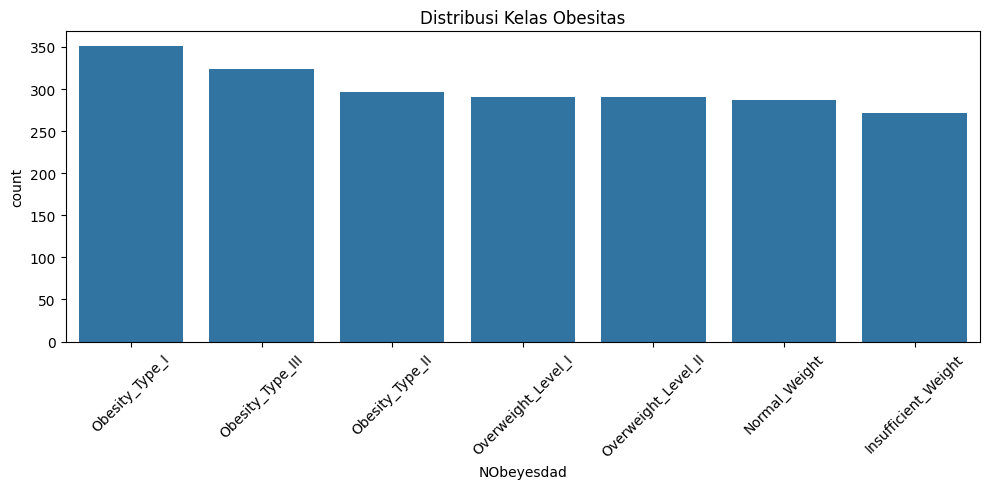

In [8]:
# Distribusi target (kelas obesitas)
plt.figure(figsize=(10, 5))
sns.countplot(x='NObeyesdad', data=df, order=df['NObeyesdad'].value_counts().index)
plt.title('Distribusi Kelas Obesitas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
# Cek missing values
print("\nMissing values:")
print(df.isnull().sum())

# Unique value setiap kolom
print("\nUnique values per kolom:")
print(df.nunique())

# Cek data duplikat
print("\nJumlah data duplikat:", df.duplicated().sum())


Missing values:
Age                               14
Gender                             9
Height                            12
Weight                            11
CALC                               5
FAVC                              11
FCVC                               8
NCP                               12
SCC                               10
SMOKE                              5
CH2O                               6
family_history_with_overweight    13
FAF                                8
TUE                                9
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64

Unique values per kolom:
Age                               1394
Gender                               3
Height                            1562
Weight                            1518
CALC                                 5
FAVC                                 3
FCVC                               808
NCP                                637
SCC

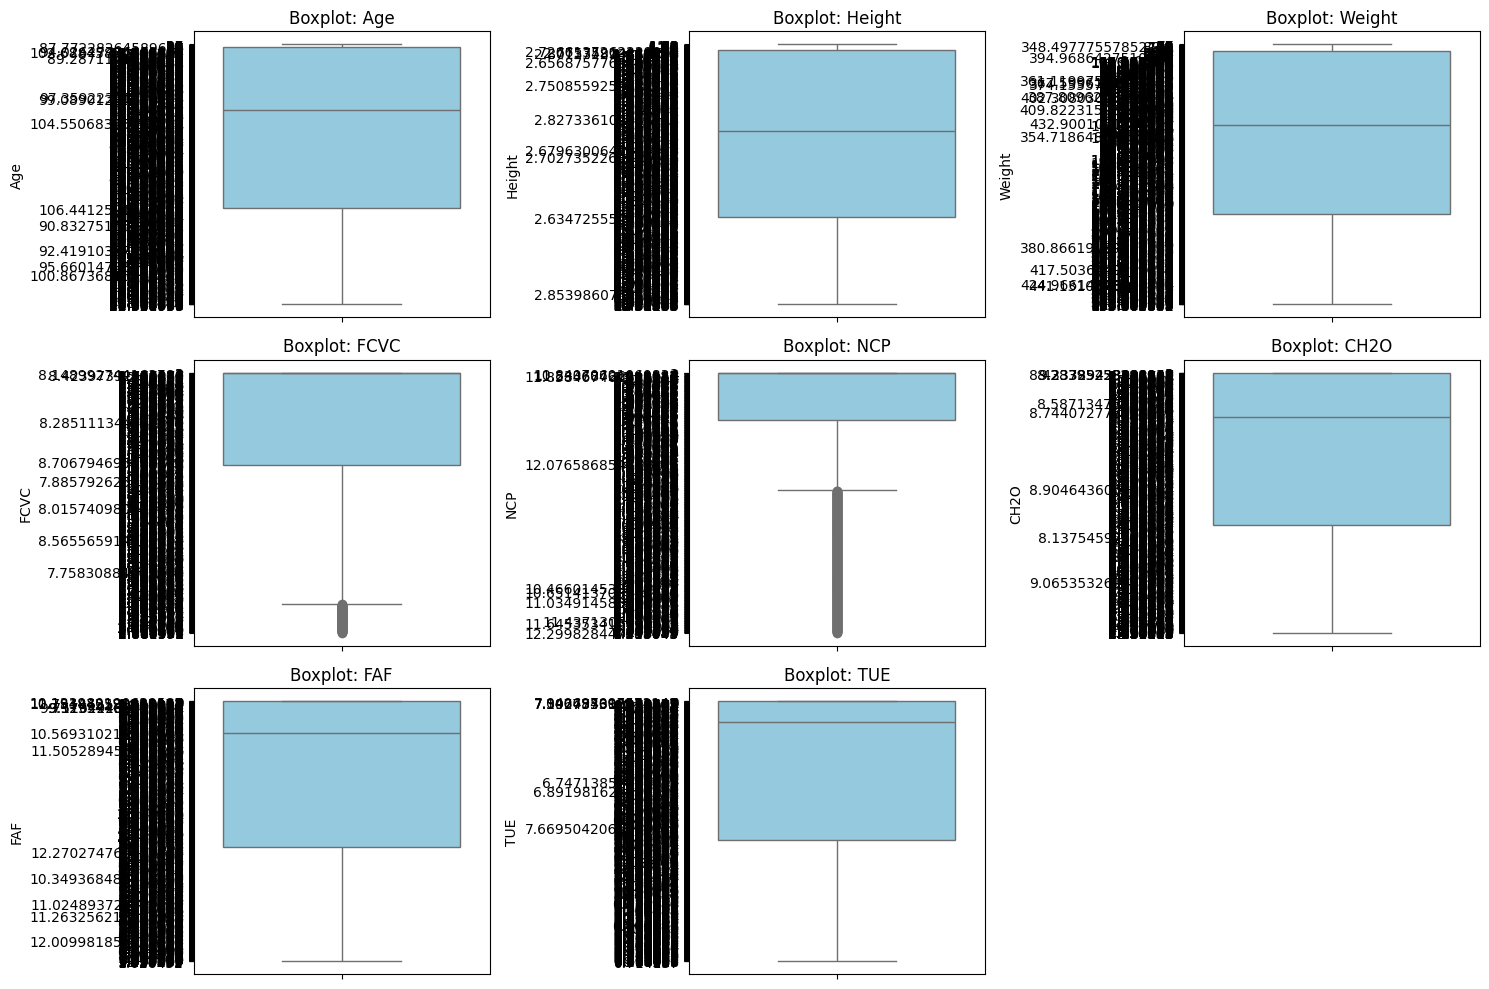

In [10]:
# Visualisasi boxplot untuk deteksi outlier
numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot: {col}')
plt.tight_layout()
plt.show()

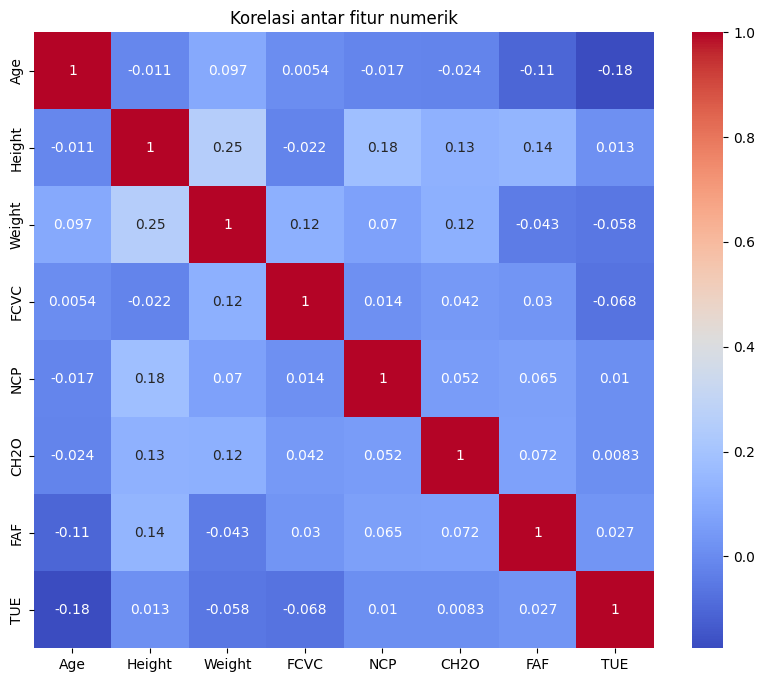

In [11]:
# Ganti tanda tanya '?' dengan NaN
df.replace('?', np.nan, inplace=True)

# Pastikan kolom numerik benar-benar dalam bentuk numerik
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Korelasi antar fitur numerik
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi antar fitur numerik')
plt.show()

In [12]:
# Penanganan outlier menggunakan metode IQR
print("\nMenghapus outlier menggunakan metode IQR...")
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    before = df.shape[0]
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    after = df.shape[0]
    print(f"- {col}: {before - after} baris dihapus")


Menghapus outlier menggunakan metode IQR...
- Age: 201 baris dihapus
- Height: 30 baris dihapus
- Weight: 31 baris dihapus
- FCVC: 22 baris dihapus
- NCP: 526 baris dihapus
- CH2O: 13 baris dihapus
- FAF: 23 baris dihapus
- TUE: 14 baris dihapus


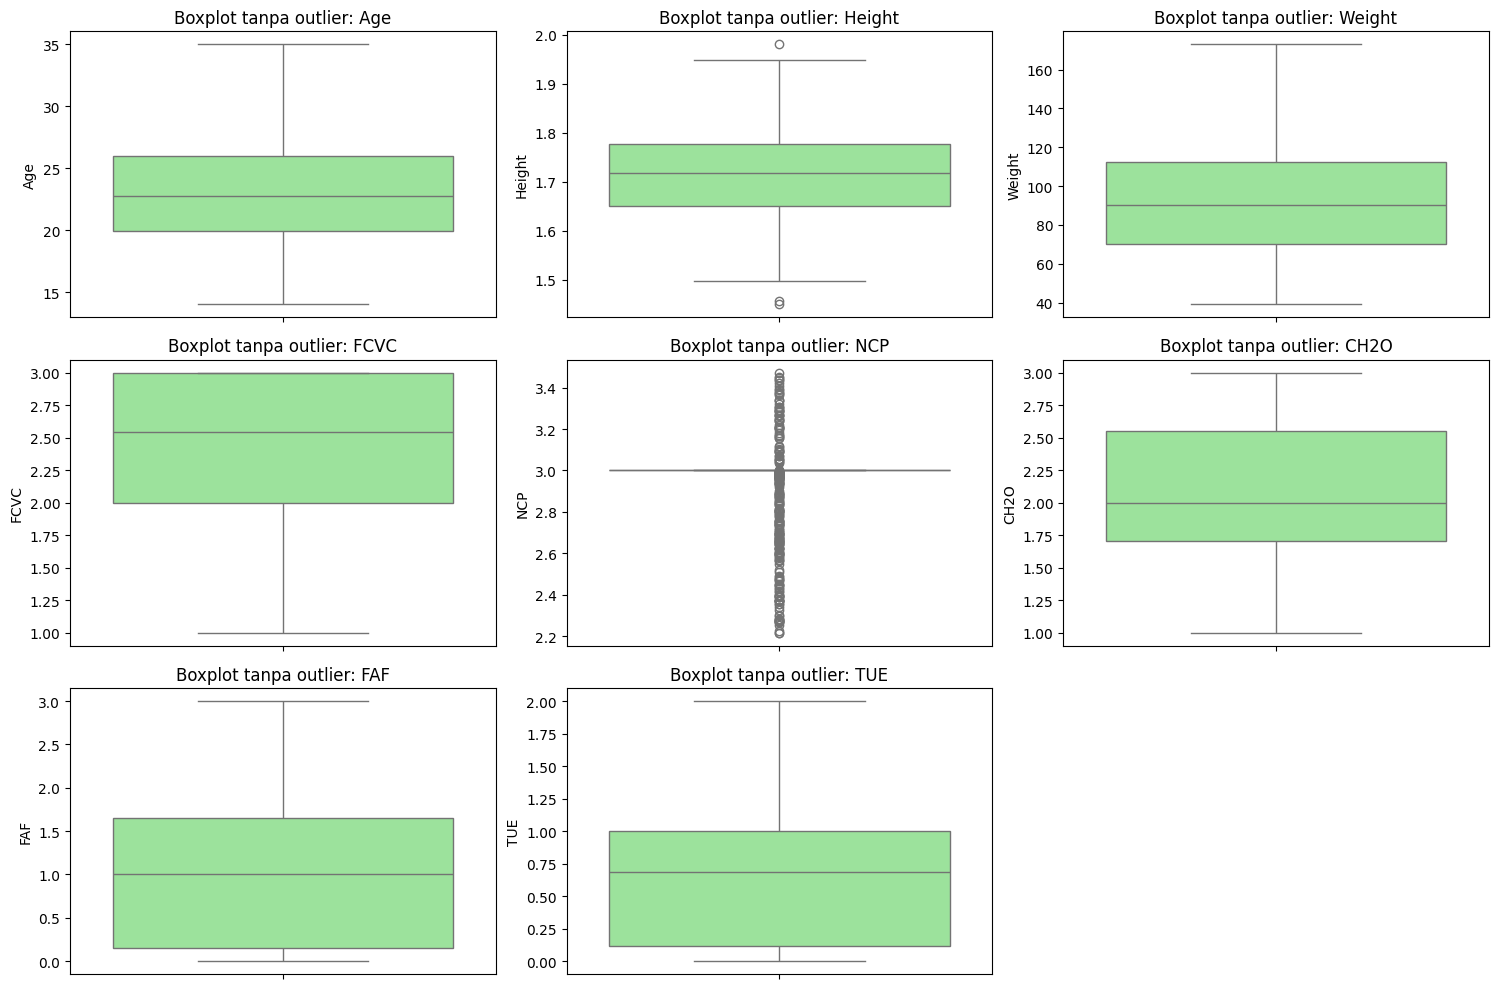

In [13]:
# Boxplot ulang setelah outlier dibuang
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(f'Boxplot tanpa outlier: {col}')
plt.tight_layout()
plt.show()

In [14]:
# Kesimpulan EDA
print("\nKESIMPULAN EDA:")
print("- Dataset terdiri dari", df.shape[0], "baris dan", df.shape[1], "kolom.")
print("- Tidak ditemukan missing values.")
print("- Kelas target tidak seimbang, perlu penanganan.")
print("- Outlier berhasil dihapus dari fitur numerik.")


KESIMPULAN EDA:
- Dataset terdiri dari 1251 baris dan 17 kolom.
- Tidak ditemukan missing values.
- Kelas target tidak seimbang, perlu penanganan.
- Outlier berhasil dihapus dari fitur numerik.


In [15]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Identifikasi kolom kategorikal (selain target)
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('NObeyesdad')  # Target jangan di-encode dulu

# Label Encoding kolom kategorikal
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Encode target label
df['NObeyesdad'] = le.fit_transform(df['NObeyesdad'])  # Simpan label encoder untuk deployment

# Cek hasil encoding
print("\nDataset setelah encoding:")
print(df.head())

# Pisahkan fitur (X) dan target (y)
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# Informasi akhir preprocessing
print("\nKESIMPULAN PREPROCESSING:")
print("- Fitur kategorikal telah diubah menjadi numerik.")
print("- Semua fitur telah dinormalisasi.")
print("- Data telah dibagi menjadi data latih dan uji (80:20).")



Dataset setelah encoding:
    Age  Gender  Height  Weight  CALC  FAVC  FCVC  NCP  SCC  SMOKE  CH2O  \
0  21.0       0    1.62    64.0     2     0   2.0  3.0    0      0   2.0   
1  21.0       0    1.52    56.0     1     0   3.0  3.0    1      1   3.0   
2  23.0       1    1.80    77.0     0     0   2.0  3.0    0      0   2.0   
3  27.0       1    1.80    87.0     0     0   3.0  3.0    0      0   2.0   
5  29.0       1    1.62    53.0     1     1   2.0  3.0    0      0   2.0   

   family_history_with_overweight  FAF  TUE  CAEC  MTRANS  NObeyesdad  
0                               1  0.0  1.0     2       3           1  
1                               1  3.0  0.0     2       3           1  
2                               1  2.0  1.0     2       3           1  
3                               0  2.0  0.0     2       4           5  
5                               0  0.0  0.0     2       0           1  

KESIMPULAN PREPROCESSING:
- Fitur kategorikal telah diubah menjadi numerik.
- Semua